**LabML03a**

Purpose: Identify clusters of Gira docking station

1 import libraries needed:numpy, sklearn, matplotlib and pandas

2 generate a sample of blobs and convert it into a dataframe called df1

3 Verify datatype

4 Plot the blobs

5 calculete WCSS

6 plot the new chart with centroids

7 identify to what group does each item belongs

Comment the code

In [4]:
#importar bibliotecas numpy e pandas e invocar o matplotlib e sklearn.cluster e importar pyplot e KMeans
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.cluster import KMeans

In [2]:
#Guardar um string na variavel file
file='https://github.com/masterfloss/data/blob/main/giras201030.csv?raw=true'
#ler um ficheiro csv e criar um df com os valores obtidos
dfGiras=pd.read_csv(file,sep=';')

In [3]:
#Mostra as 5 primeiras linhas da tabela
dfGiras.head()

,desigcomercial,numbicicletas,numdocasvacias,position,add_data,add_hora
0,206 - Av. Brasília / Doca de Alcântara,2,20,"{""coordinates"": [-9.175, 38.701], ""type"": ""Poi...",2019-07-30,15:07:34.
1,110 - Rua de Moscavide,5,13,"{""coordinates"": [-9.097068, 38.778466], ""type""...",2020-10-30,19:49:28.
2,208 - Cais das Pombas,11,11,"{""coordinates"": [-9.14373, 38.70523], ""type"": ...",2020-10-30,19:49:29.
3,415 - Av. Duque de Ávila / Av. Conde Valbom,2,18,"{""coordinates"": [-9.148443, 38.735188], ""type""...",2020-10-30,19:49:29.
4,423 - Av. Conde Valbom / Rua Marquês Sá da Ban...,5,5,"{""coordinates"": [-9.152295, 38.737911], ""type""...",2020-10-30,19:49:29.


In [4]:
#procurar na primeira linha, na coluna 'position' o valor com index 1 (que é [-9.175,) e retirar o [ e , 
dfGiras.loc[0,'position'].split()[1].replace('[','').replace(',','')

'-9.175'

In [5]:
#cria novas colunas lon e lat onde:
#na coluna long em cada linha vai à coluna 'position' buscar o valor com index 1 e retirar o [ e , 
# na coluna lat em cada linha vai à coluna 'position' buscar o valor com index 2 e retirar o ]
for i in range(len(dfGiras['position'])):
    dfGiras.loc[i,'long']=dfGiras.loc[i,'position'].split()[1].replace('[','').replace(',','')
    dfGiras.loc[i,'lat']=dfGiras.loc[i,'position'].split()[2].replace('],','')
    
    

In [6]:
#Mostra as 5 primeiras linhas da tabela
dfGiras.head()

,desigcomercial,numbicicletas,numdocasvacias,position,add_data,add_hora,long,lat
0,206 - Av. Brasília / Doca de Alcântara,2,20,"{""coordinates"": [-9.175, 38.701], ""type"": ""Poi...",2019-07-30,15:07:34.,-9.175,38.701
1,110 - Rua de Moscavide,5,13,"{""coordinates"": [-9.097068, 38.778466], ""type""...",2020-10-30,19:49:28.,-9.097068,38.778466
2,208 - Cais das Pombas,11,11,"{""coordinates"": [-9.14373, 38.70523], ""type"": ...",2020-10-30,19:49:29.,-9.14373,38.70523
3,415 - Av. Duque de Ávila / Av. Conde Valbom,2,18,"{""coordinates"": [-9.148443, 38.735188], ""type""...",2020-10-30,19:49:29.,-9.148443,38.735188
4,423 - Av. Conde Valbom / Rua Marquês Sá da Ban...,5,5,"{""coordinates"": [-9.152295, 38.737911], ""type""...",2020-10-30,19:49:29.,-9.152295,38.737911


In [7]:
#criar no data frame com as colunas long e lat
df1=dfGiras[['long','lat']]
#mostrar o tipo de dados
df1.dtypes

long    object
lat     object
dtype: object

In [8]:
#passar os dados de objetos para floats
df1.loc[:,'long']=pd.to_numeric(df1.loc[:,'long'])
df1.loc[:,'lat']=pd.to_numeric(df1.loc[:,'lat'])


C:\Users\pedro\Anaconda3\lib\site-packages\pandas\core\indexing.py:576: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item_labels[indexer[info_axis]]] = value
C:\Users\pedro\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [9]:
#mostrar o tipo de dados
df1.dtypes

long    float64
lat     float64
dtype: object

Text(0, 0.5, 'lat')

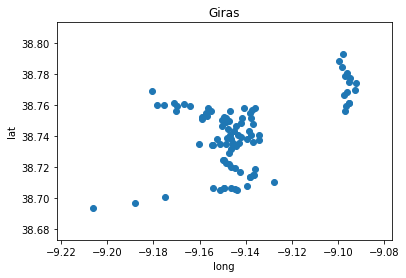

In [10]:
#criar grafico com os data frames de long e lat
plt.scatter(df1['long'], df1['lat'])
#onde o titulo é 'Giras'
plt.title('Giras')
#No eixo do X fica o long
plt.xlabel('long')
#No eixo do Y fica o lat
plt.ylabel('lat')

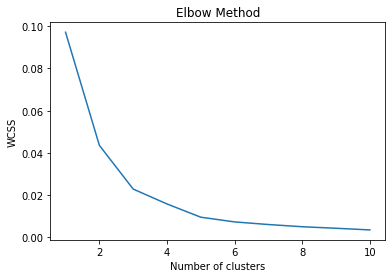

In [11]:
#definir o número de clusters para o KMeans
wcss = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    model.fit(df1)
    wcss.append(model.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

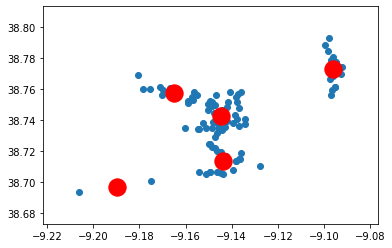

In [19]:
model1 = KMeans(n_clusters=5, init='k-means++', max_iter=400, n_init=10, random_state=0)
model1.fit_predict(df1)
plt.scatter(df1["long"], df1["lat"])
plt.scatter(model1.cluster_centers_[:, 0], model1.cluster_centers_[:, 1], s=300, c='red')
plt.show()


In [13]:
model1.predict(df1.loc[0:0,:])

array([4])

In [14]:
model1.predict(df1)

array([4, 2, 0, 1, 1, 0, 1, 1, 2, 1, 3, 3, 1, 1, 1, 1, 0, 0, 0, 2, 1, 1,
       1, 0, 1, 3, 0, 3, 1, 3, 1, 0, 1, 1, 3, 2, 3, 1, 0, 1, 1, 0, 3, 1,
       0, 1, 1, 2, 1, 1, 0, 3, 4, 4, 3, 2, 2, 2, 1, 1, 2, 0, 1, 1, 0, 0,
       2, 0, 3, 2, 1, 1, 0, 1, 1, 1, 3, 2, 0, 1, 0, 1, 3, 3, 1, 0, 2, 1,
       1, 2, 1, 1, 3, 0, 2, 1])